In [3]:
import pandas as pd
import os
import glob

### Task # Merge all 12 month files into one file

In [4]:
path = r'C:\Users\Asad\Desktop\Sales Anaylsis Project\salesdata' # use your path

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)

    li.append(df)

frame = pd.concat(li, axis=0)

frame.to_csv('all_data.csv' , index = False)


#### Read Updated dataframe

In [5]:

all_data = pd.read_csv('all_data.csv')
all_data = all_data.drop('Unnamed: 0',axis=1)
all_data = all_data.drop('Unnamed: 0.1',axis=1)
all_data = all_data.drop('Unnamed: 0.1.1',axis=1)
all_data = all_data.drop('Unnamed: 0.1.1.1',axis=1)
all_data = all_data.drop('Unnamed: 0.1.1.1.1',axis=1)

### Clean Up the data

In [6]:
#Finding NaN rows
nan_df = all_data[all_data.isna().any(axis=1)]
all_data =  all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
419385,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
419386,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
419387,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
419388,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']


In [13]:
all_data.loc[:,'Quantity Ordered'] = pd.to_numeric(all_data.loc[:,'Quantity Ordered'])
all_data.loc[:,'Price Each'] = pd.to_numeric(all_data.loc[:,'Price Each'])

#### Argument data with additional Columns

In [45]:
all_data.loc[:,'Month'] = all_data.loc[:,'Order Date'].str[0:2]
all_data.loc[:,'Month'] = all_data.loc[:,'Month'].astype('int32')

C:\Users\Asad\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### Add a city Column

In [54]:
# let use .apply method
def get_city(address):
    return address.split(',')[1]

all_data.loc[:,'City'] = all_data.loc[:,'Purchase Address'].apply(lambda x:get_city(x))
all_data

C:\Users\Asad\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
419385,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
419386,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
419387,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
419388,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


### adding sales column

In [35]:

all_data.loc[:,'Sales'] = all_data.loc[:,'Quantity Ordered'] * all_data.loc[:,'Price Each']


C:\Users\Asad\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


#### Q1 :Best sales in which month?

In [33]:
results = all_data.groupby('Month').sum()

### Visualiztions of best sales

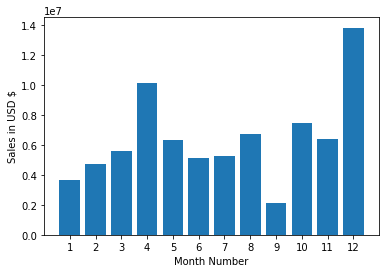

In [43]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month Number')
plt.show()

### Q2:What city had highest number of sales